TRATAMENTO DE DADOS - FAÇA VOCE MESMO - FORMAÇÃO CD ✌

In [ ]:
#Fazendo upload do dataset para o Google Colab, caso esteja no Jupyter não executar o codigo.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tempo.csv to tempo.csv
User uploaded file "tempo.csv" with length 390 bytes


In [ ]:
#Importando Bibliotecas
import pandas as pd
import statistics as sts 
import seaborn as srn

In [ ]:
#importando dataset
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
#verificando o tamanho do dataset
dataset.shape

(14, 5)

Primeiramente começamos a analisar os dados com valores qualitativos (categoricos)




*Colunas(Aparencia, Vento e Jogar)*

In [ ]:
#agrupando e verificando frequencia da coluna aparencia
agrup = dataset.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

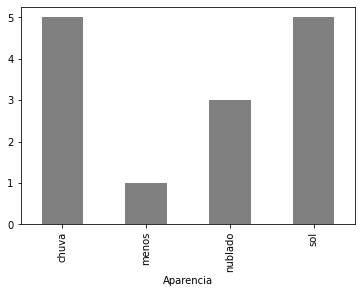

In [ ]:
#verificasse que a variavel menos está fora do dominio
#criando grafico em barras para visualizar
agrup.plot.bar(color='gray')

In [ ]:
#agrupando e verificando frequencia dos valores coluna vento
agrup = dataset.groupby(["Vento"]).size()
agrup

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

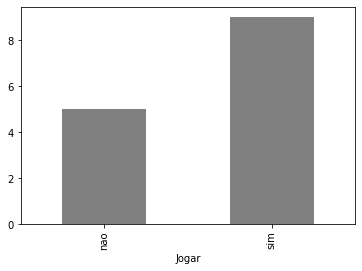

In [ ]:
#criando grafico em barras para visualizar
agrup.plot.bar(color='gray')

In [ ]:
#agrupando e verificando frequencia dos valores coluna Jogar
agrup = dataset.groupby(["Jogar"]).size()
agrup

Jogar
nao    5
sim    9
dtype: int64

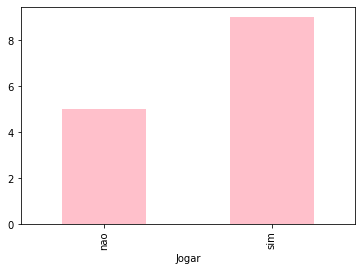

In [ ]:
#criando grafico em barras para visualizar
agrup.plot.bar(color='pink')

Agora analisando os dados com valores quantitativos (temperatura, humidade)

In [ ]:
#Explorando Temperatura
#Dominio da Temperatura é entre -130°F e 130°F
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Temperatura')

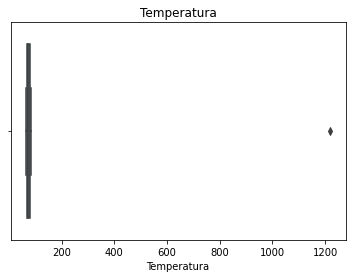

In [ ]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

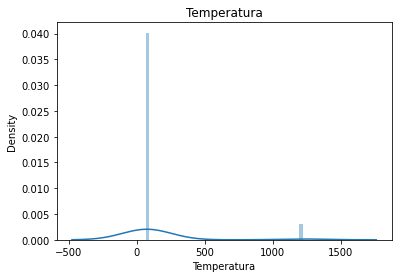

In [ ]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [ ]:
#Explorando Temperatura
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umidade')

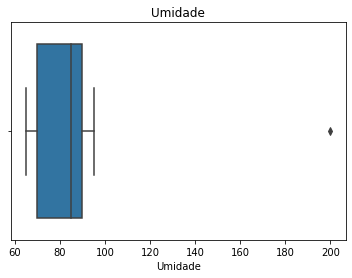

In [ ]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

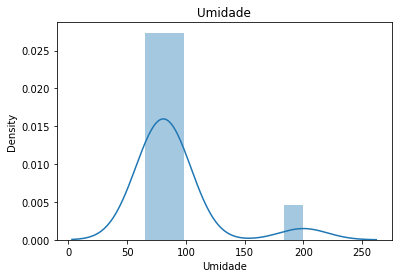

In [ ]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

Verificando Valores Nulos


In [ ]:
#contanto valores nulos
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

Tratando variaveis Qualitativas

In [ ]:
agrup = dataset.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
#substituindo o valor invalido pela moda do conjunto
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "sol"

In [ ]:
#verificando se foi tratado
agrup = dataset.groupby(['Aparencia']).size()
agrup

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [ ]:
#substituindo o valor invalido pela moda do conjunto
dataset.loc[dataset['Aparencia'] == 'Sol', 'Aparencia'] = "sol"

In [ ]:
#verificando se foi tratado
agrup = dataset.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [ ]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#calcular mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [ ]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura' ] = mediana

In [ ]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#visualizar 
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [ ]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [ ]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade' ] = mediana

In [ ]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset['Umidade'].isnull().sum()

1

In [ ]:
dataset['Umidade'].fillna(mediana, inplace=True)
dataset['Umidade'].isnull().sum()

0

In [ ]:
#contanto valores nulos
dataset['Vento'].isnull().sum()

1

In [ ]:
agrup = dataset.groupby(['Vento']).size()
agrup

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
moda = sts.mode(dataset['Vento'])
moda

'FALSO'

In [ ]:
dataset['Vento'].fillna(moda, inplace=True)
dataset['Vento'].isnull().sum()

0